In [1]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import time

In [5]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://news.sbs.co.kr/news/newsflash.do?plink=SNB&cooper=SBSNEWS")
driver.maximize_window()

In [6]:
soup = bs(driver.page_source, 'html.parser')

In [7]:
# url 첫페이지 추출
driver = webdriver.Chrome(ChromeDriverManager().install()) 
driver.get("https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN")

#select 사용
soup = bs(driver.page_source, 'html.parser')
serach = soup.select('a.news')
for i in serach:
    print('https://news.sbs.co.kr/'+i['href'])

#findall 사용
search2 = soup.find_all('a', class_='news')
for i in search2:
    print('https://news.sbs.co.kr/'+i['href'])

https://news.sbs.co.kr//news/endPage.do?news_id=N1006897678
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897663
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897162
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897606
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897472
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897508
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897198
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897390
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897333
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897535
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897678
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897663
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897162
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897606
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897472
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897508
https://news.sbs.co.kr//news/endPage.do?

In [8]:
url_list=[]
for i in range(1,6):
    page_url = 'https://news.sbs.co.kr/news/newsflash.do?plink=SNB&cooper=SBSNEWS&pageIdx={}'.format(i)
    driver.get(page_url)
    time.sleep(1)  #웹 페이지가 바뀌면 반드시 로딩 시간을 주는게 좋다
    
    #객체화 진행하기_페이지 바뀌면 진행되야함
    soup.bs=(driver.page_source, 'html.parser')
    search = soup.select('a.news')
    for i in search:
        url_list.append('https://news.sbs.co.kr/'+i['href'])

In [10]:
title_list=[]
contents_list=[]

for url in url_list:
    driver.get(url)
    time.sleep(1)  #웹 페이지가 바뀌면 반드시 로딩 시간을 주는게 좋다
    #객체화 진행하기_페이지 바뀌면 진행되야함
    soup = bs(driver.page_source, 'html.parser')
    
    #기사제목
    title = soup.select('h2.blind.ir')
#    for i in title:
#        title_list.append(i.text)
    title_list.append(title[0].text)
    
    #기사내용
    content = soup.select('div.text_area')
#    for i in title:
#        contents_list.append(i.text)
    contents_list.append(content[0].text)

In [17]:
len(title_list),len(contents_list)

(50, 50)

In [18]:
import pickle

In [20]:
with open('save_data.pkl','wb') as f:
    pickle.dump(contents_list,f)

In [21]:
with open('save_data.pkl','rb') as f:
    data=pickle.load(f)

In [22]:
data=data[:3]

In [39]:
total=''
for i in data:
    string = i.replace("\n",'')
    string = i.replace("\\",'')
    total=total+string

In [25]:
total

'  국민의힘 이준석 전 대표는 당 지도부와 윤리위원회를 겨냥해 "윤석열 대통령이 이번에 또 순방하신다고 하는데 그사이에 뭔가를 꾸미고 있지 않을까"라고 말했습니다.   이 전 대표는 CBS 라디오 \'김현정의 뉴스쇼\' 인터뷰에서 "지난 몇 달을 살펴보면 윤 대통령이 출국하거나 어디에 가시면 꼭 그 사람들이 일을 벌였다"며 "\'체리따봉\'하고 휴가 간 사이에 비대위 한다고 난리 났었다"고 비판했습니다.   이어 "휴가 사이에 비대위 완료하라는 식의 지령이 있었단 얘기가 있었다"며 "나토 가셨을 때도 엄청나게 공격이 들어왔다"고 덧붙였습니다.   이 전 대표는 \'공격\'에 대해서는 "어떻게든 빌미를 만들어서 제명 시나리오를 가동할 것 같다"며 "윤리위를 사실 오늘 열려면 오늘 저녁에 열 수도 있다"고 주장했습니다.   다만 제명된다면 신당을 창당할 의사가 있냐는 질문에는 "전혀 고민 안 하고 있다"고 선을 그었습니다.   이 전 대표는 "제명은 진짜 정치파동을 넘어 제가 역사책에 이름이 나올 일"이라며 "그런 일이 발생하면 그 상황을 한번 판단해보겠다"고 덧붙였습니다.   또 \'윤 대통령으로부터 이XX, 저XX라는 욕설을 들은 게 사실이냐\'는 질문에는 "그것보다 한 단계 높은 것도 많이 들었다"라며 "뭐뭐뭐 할 뭐뭐"라고 언급했습니다.   (사진=국회사진기자단, 연합뉴스)   국민의힘 정진석 비상대책위원장은 "한일 양국이 올바른 미래지향적 관계로 발전해 나가야 한다"며 "양국이 처한 엄중한 상황에 대해 성찰하고 \'윈윈\'하는 관계로 거듭나야 한다"고 말했습니다.   정 위원장은 제주국제컨벤션센터에서 열린 제17회 \'평화와 번영을 위한 제주포럼\'에서 한일의원연맹 회장 자격으로 한 한일의원특별세션 개회사를 통해 이같이 밝혔습니다.   정 위원장은 동북아를 비롯한 국제 정세와 관련해 "미·중 간의 대립과 러시아-우크라이나 간 전쟁 등으로 국제정세가 꽁꽁 얼어붙고 전 세계적 물가상승 압력 등 경제 불황이 지속되고 있으며, 강대국들은 저마다 내셔널리즘(na

In [26]:
from konlpy.tag import Okt
okt=Okt()
stopwords=['있다', '하다', '되다', '먹다']

In [29]:
def extract_tag(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in ['Verb','Noun','Adjective']:
            if word not in stopwords:
                result_words.append(word)
            
    return result_words

In [30]:
text_data = extract_tag(total)
text_data

['국민',
 '힘',
 '이준석',
 '전',
 '대표',
 '당',
 '지도',
 '부와',
 '윤리',
 '위원회',
 '겨냥',
 '윤석열',
 '대통령',
 '이번',
 '또',
 '순방',
 '사이',
 '뭔가',
 '꾸미다',
 '않다',
 '말',
 '이',
 '전',
 '대표',
 '라디오',
 '김현정',
 '뉴스쇼',
 '인터뷰',
 '지난',
 '몇',
 '달',
 '살펴보다',
 '윤',
 '대통령',
 '출국',
 '거나',
 '어디',
 '가시',
 '꼭',
 '그',
 '사람',
 '일',
 '벌이다',
 '며',
 '체리',
 '따다',
 '봉',
 '휴가',
 '간',
 '사이',
 '비',
 '대위',
 '난리',
 '나다',
 '고',
 '비판',
 '이다',
 '휴가',
 '사이',
 '비',
 '대위',
 '완료',
 '식',
 '지령',
 '얘기',
 '며',
 '나토',
 '가다',
 '때',
 '엄청나다',
 '공격',
 '들어오다',
 '고',
 '덧붙이다',
 '이',
 '전',
 '대표',
 '공격',
 '대해',
 '서다',
 '게',
 '빌다',
 '밉다',
 '만들다',
 '제명',
 '시나리오',
 '가동',
 '것',
 '같다',
 '며',
 '윤리',
 '위',
 '사실',
 '오늘',
 '열리다',
 '오늘',
 '저녁',
 '열',
 '수도',
 '고',
 '주장',
 '다만',
 '제명',
 '신당',
 '창',
 '당하다',
 '의사',
 '질문',
 '전혀',
 '고민',
 '안',
 '고',
 '선',
 '었습',
 '이',
 '전',
 '대표',
 '제명',
 '진짜',
 '정치',
 '파동',
 '넘다',
 '제',
 '역사',
 '책',
 '이름',
 '나오다',
 '일',
 '라며',
 '그렇다',
 '발생',
 '그',
 '상황',
 '한번',
 '판단',
 '해보다',
 '고',
 '덧붙이다',
 '또',
 '윤',
 '대통령',
 '이',
 '저',
 '욕설',
 '들다',
 

In [32]:
count = Counter(text_data)
count

Counter({'국민': 2,
         '힘': 3,
         '이준석': 1,
         '전': 8,
         '대표': 4,
         '당': 1,
         '지도': 1,
         '부와': 1,
         '윤리': 2,
         '위원회': 1,
         '겨냥': 1,
         '윤석열': 1,
         '대통령': 5,
         '이번': 1,
         '또': 3,
         '순방': 1,
         '사이': 3,
         '뭔가': 1,
         '꾸미다': 1,
         '않다': 3,
         '말': 5,
         '이': 5,
         '라디오': 1,
         '김현정': 1,
         '뉴스쇼': 1,
         '인터뷰': 1,
         '지난': 2,
         '몇': 1,
         '달': 1,
         '살펴보다': 1,
         '윤': 2,
         '출국': 1,
         '거나': 1,
         '어디': 1,
         '가시': 1,
         '꼭': 1,
         '그': 3,
         '사람': 1,
         '일': 3,
         '벌이다': 1,
         '며': 8,
         '체리': 1,
         '따다': 1,
         '봉': 1,
         '휴가': 2,
         '간': 2,
         '비': 3,
         '대위': 2,
         '난리': 1,
         '나다': 1,
         '고': 10,
         '비판': 2,
         '이다': 5,
         '완료': 1,
         '식': 1,
         '지령': 

In [34]:
count.most_common(10) #많이 빈출된 단어 top n개 가져옴

[('김', 15),
 ('사부', 14),
 ('닥터', 13),
 ('낭만', 12),
 ('시즌', 12),
 ('고', 10),
 ('전', 8),
 ('며', 8),
 ('양국', 8),
 ('위원장', 6)]

### 워드클라우드 선언하기(영어만 인식해서, 한글쓰려면 폰트지정)

In [52]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width=700, height=700,
                      background_color='white',colormap='winter', mask=mask_image, random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

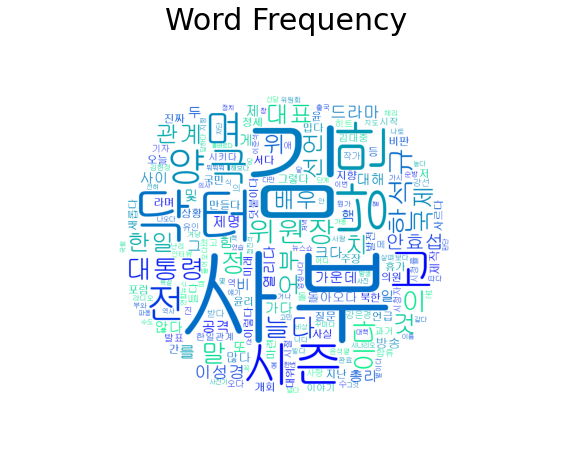

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size=30)
plt.show

In [41]:
from PIL import Image
import numpy as np

In [51]:
mask_image = np.array(Image.open(r'C:\Users\user\Desktop\춘식.jpg'))  #배경하얀색인걸로 이미지 가져와야 됨
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]